In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.shape

(100, 4)

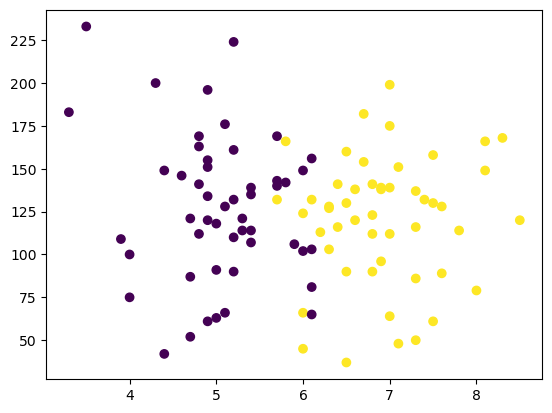

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [5]:
# ei plot e amra dekhte pacchi holud gula placement hoyeche. purple gula hoyni. ei data gular majhe ekta straight line tene alada kora jay.
# erokom jaderke straight line tene alda kora jay sekhane amra logistic regression use korbo.

In [6]:
# steps:

# 0. Preprocess + EDA + feature selection
# 1. Extract input and output cols
# 2. scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/ model selection
# 6. Deploy the model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
df = df.iloc[:,1:] # ami odorkari coloumn gula remove korte chai. tai ami : diye sob row gula niye nilam. 1: diye 1no. column soho porer sob column niye nilam. er karone 0 no. column ta bad jabe. 


In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
# amra ekhon step 1 korbo. mane input output col extract korbo.
# suru te input col gula alada kore dibo. then output col alada kore nibo. 

X = df.iloc[:,0:2] # mane sob row niyechi and column 0 theke 2 porjonto niyechi. kintu 2 nei ni.. 0,1 niyechi.
Y = df.iloc[:,-1] # mane sob row niyechi and -1 diye last col niyechi. 


In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
#  ebar amra train test split korbo. er jonno amaderke sklearn library use korte hobe.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1) # ekhane amra independent variable X and depended variable Y niyechi. test_size=10% niyechi, mane joto gula data ache tar moddhe 10% data ami rekhe dibo ar baki 90% data diye model train korbo.

# amra 4 Ta variable e training and test data gula store kore nilam.

In [14]:
X_train

,cgpa,iq
53,8.3,168.0
19,5.2,132.0
24,4.7,121.0
16,5.2,224.0
33,6.0,149.0
...,...,...
84,5.7,169.0
47,5.2,161.0
99,6.2,113.0
34,4.8,163.0


In [15]:
Y_train

53    1
19    0
24    0
16    0
33    0
     ..
84    0
47    0
99    1
34    0
6     0
Name: placement, Length: 90, dtype: int64

In [16]:
# ebar amra scale the values korbo. er jonno o sklearn lagbe.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit_transform er kaj holo eta dekhe data te ki ache then seta k transform kore dey.

In [17]:
X_train # ekhane X_train er value gula -1 theke 1 er moddhye transform korano hoyeche..

array([[ 2.03124613,  1.08152527],
       [-0.69335805,  0.16612771],
       [-1.13281034, -0.11357711],
       [-0.69335805,  2.50547704],
       [ 0.00976561,  0.59839878],
       [-0.78124851,  0.06441687],
       [ 0.00976561, -0.5967036 ],
       [ 0.27343698,  0.06441687],
       [-0.95702942,  0.75096504],
       [ 0.88867018, -1.56295659],
       [ 0.00976561, -0.03729397],
       [ 2.20702704, -0.13900482],
       [-0.51757714, -0.46956505],
       [ 0.80077972,  0.34412168],
       [ 0.88867018,  1.86978429],
       [ 1.32812247,  0.82724817],
       [ 0.97656064,  0.6492542 ],
       [-1.835934  , -0.41870963],
       [-0.95702942, -0.13900482],
       [ 0.09765606, -1.13068551],
       [-0.95702942, -1.63923972],
       [ 0.71288927, -0.90183612],
       [ 1.15234155,  0.29326626],
       [-0.95702942,  0.6492542 ],
       [ 0.88867018,  0.34412168],
       [ 1.15234155, -0.24071566],
       [-0.51757714,  0.34412168],
       [ 1.41601292,  0.06441687],
       [ 0.00976561,

In [18]:
X_test = scaler.transform(X_test) # amra ager bar e pattern bujhe gechi tai ar fit korar dorkar nai. direct transform use korechi.
X_test

array([[-0.86913897, -0.87640841],
       [ 0.88867018, -0.3424265 ],
       [ 1.76757475, -1.18154093],
       [-1.48437217,  1.895212  ],
       [-0.25390577,  0.36954939],
       [-0.86913897, -1.5883843 ],
       [ 0.27343698,  0.03898916],
       [-0.69335805, -0.90183612],
       [ 1.32812247, -1.63923972],
       [ 0.09765606, -0.57127589]])

In [40]:
# ebar model k train korbo. 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [44]:
clf.fit(X_train,Y_train) # ekhane fit diyei amra mainly model k train kore thaki.

LogisticRegression()

In [46]:
# ekhane Evaluate the model/ model selection korbo. 
# mane ekhane amra predict korbo.

clf.predict(X_test)


array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [48]:
Y_test

25    0
29    1
58    1
95    0
36    0
7     0
70    1
28    0
44    1
14    0
Name: placement, dtype: int64

In [52]:
# uporer data gula theke amra dekhte pacchi amader model jeta predict korlo seta asole accurate kina. 
# ei kaj ta amra sklearn diyeo korte pari. tokhon amra accuracy percentage dekhte parbo.

In [66]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred) # output e amra dekhtechi 0.9 accuracy , mane 90%

0.9

<Axes: >

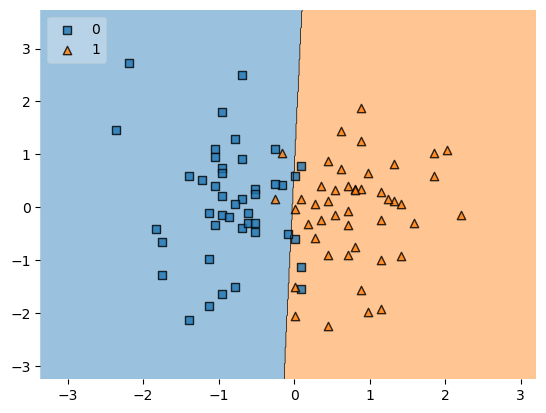

In [80]:
# ebar dekhbo how to plot decision boundary. mane ml model data te kmn pattern notice korlo seta visualization dekhbo decision boundary use kore..
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2) # as a beginner amra egula google theke niyechi. advanced hole nije code likhbo.




In [91]:
# last step

import pickle # pickle er kaj holo kono object k file e convert kore and sei file k amra onno environment e use korte pari.

pickle.dump(clf,open('model.pkl','wb')) 

# clf object k amra export korlam, setake ekta file e convert korlam jar nam model.pkl and etake amra binary mode write korlam.
# ei model.pkl tai amder machine learning model

In [93]:
# amra amder model peye gechi, ekhon amader kaaj holo amra ei model er jonno ekta website banabo. then sei website server e deploy kore dibo.
# deploy korar jonno amra platform hisebe heroku, aws, gcp egula use korte pari. Herocu is recommended.
